## What is the total household income per year??

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("income_expense_data.csv")

In [4]:
total_income_per_year = df.groupby("REF_DATE")["Income"].sum()

In [5]:
print(total_income_per_year)

REF_DATE
2010    231332020.0
2011    236453650.0
2012    240630900.0
2013    244531010.0
2014    248958970.0
2015    252134020.0
2016    255105340.0
2017    259694610.0
2019    268610440.0
2021    281113150.0
Name: Income, dtype: float64


## What is the average expense per province?

In [6]:
avg_expense_per_province = df.groupby("GEO")["Expense"].mean()

In [7]:
print(avg_expense_per_province)

GEO
Province 1      9913.831207
Province 10     9294.256487
Province 11    10097.058175
Province 12    12217.614688
Province 13    10725.302000
Province 2      8409.790196
Province 3      8935.938062
Province 4      8601.477487
Province 5      8689.465070
Province 6      8174.689311
Province 7      8358.220356
Province 8     10683.486540
Province 9     11046.595285
Name: Expense, dtype: float64


## What is the trend of income vs.expense over the years?

In [9]:
pip install matplotlib

  Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.10.1-cp312-cp312-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


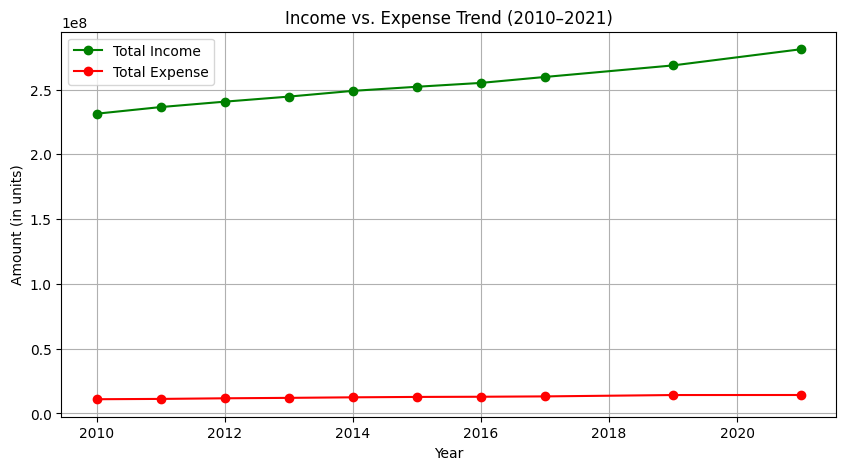

In [18]:
yearly_data = df.groupby("REF_DATE")[["Income", "Expense"]].sum() 
plt.figure(figsize=(10, 5)) 
plt.plot(yearly_data.index, yearly_data["Income"], marker='o', linestyle='-', label="Total Income", color='green') 
plt.plot(yearly_data.index, yearly_data["Expense"], marker='o', linestyle='-', label="Total Expense", color='red') 
plt.xlabel("Year") 
plt.ylabel("Amount (in units)") 
plt.title("Income vs. Expense Trend (2010–2021)") 
plt.legend() 
plt.grid(True) 
plt.show() 

## Which Family type has the highest average income?

In [19]:
avg_income_family=df.groupby("Family type")["Income"].mean()
print(avg_income_family.sort_values(ascending=False))

Family type
Couple families    190022.944771
Name: Income, dtype: float64


## How does age affect household expenditure?

In [21]:
avg_expense_by_age=df.groupby("Age of older adult")["Expense"].mean()
print(avg_expense_by_age.sort_values(ascending=False))

Age of older adult
55 to 64 years    17136.686247
45 to 54 years    11196.223385
Total all ages     9476.128054
35 to 44 years     8554.008208
25 to 34 years     6509.507579
0 to 24 years      4834.847216
Name: Expense, dtype: float64


## What is the correlation between income and expenses?

In [23]:
import numpy as np

correlation = np.corrcoef(df["Income"], df["Expense"])[0, 1]
print("Correlation between Income and Expense:", correlation)

Correlation between Income and Expense: nan


## Which income quintile spends the most?

In [24]:
expense_by_quintile = df.groupby("Before-tax household income quintile")["Expense"].sum()
print(expense_by_quintile.sort_values(ascending=False))

Before-tax household income quintile
Highest quintile    36758192.0
Fourth quintile     24609299.0
All quintiles       20942243.0
Third quintile      18758940.0
Second quintile     14171198.0
Lowest quintile     10158014.0
Name: Expense, dtype: float64


## Which provinces have the highestincome-to-expense ratio?

In [25]:
income_expense_ratio=df.groupby("GEO")[["Income","Expense"]].sum()
income_expense_ratio["Ratio"]=income_expense_ratio["Income"]/income_expense_ratio["Expense"]
print(income_expense_ratio.sort_values(by="Ratio",ascending=False))

                   Income     Expense       Ratio
GEO                                              
Province 1   1.814789e+09  10102194.0  179.643059
Province 9   4.170304e+08  11245434.0   37.084418
Province 5   5.107633e+07   8706844.0    5.866228
Province 7   4.373935e+07   8458519.0    5.171041
Province 11  4.881694e+07  10066767.0    4.849317
Province 2   3.358644e+07   8577986.0    3.915423
Province 6   2.656316e+07   8182864.0    3.246194
Province 3   1.727165e+07   8944874.0    1.930899
Province 10  1.397480e+07   9312845.0    1.500594
Province 4   1.218785e+07   8214411.0    1.483716
Province 12  1.521275e+07  12144309.0    1.252665
Province 13  1.251485e+07  10725302.0    1.166853
Province 8   1.180059e+07  10715537.0    1.101260


## How does expense distribution look?

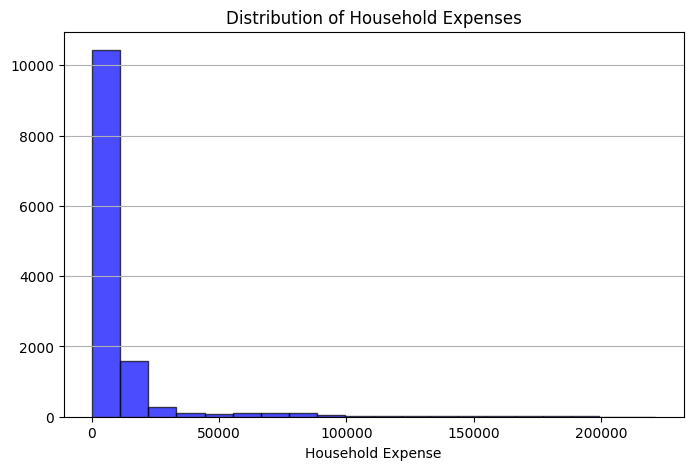

In [27]:
plt.figure(figsize=(8,5))
plt.hist(df["Expense"],bins=20,color='blue',alpha=0.7,edgecolor='black')
plt.xlabel("Household Expense")
plt.title("Distribution of Household Expenses")
plt.grid(axis='y')
plt.show()

## What is the trend of income inequality?

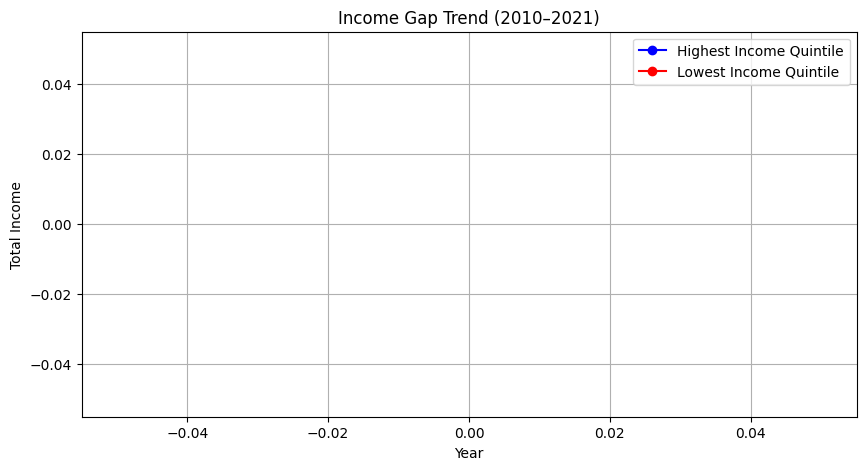

In [28]:
high_income=df[df["Before-tax household income quintile"]=="Highest"]
low_income=df[df["Before-tax household income quintile"]=="Lowest"]
high_income_trend=high_income.groupby("REF_DATE")["Income"].sum()
low_income_trend=low_income.groupby("REF_DATE")["Income"].sum()
plt.figure(figsize=(10,5))
plt.plot(high_income_trend.index, high_income_trend, marker='o', linestyle='-',label="Highest Income Quintile", color='blue')
plt.plot(low_income_trend.index, low_income_trend, marker='o', linestyle='-',label="Lowest Income Quintile", color='red') 
plt.xlabel("Year") 
plt.ylabel("Total Income") 
plt.title("Income Gap Trend (2010–2021)") 
plt.legend() 
plt.grid(True) 
plt.show()

## What is the median expense by provience?

In [29]:
median_expense_province=df.groupby("GEO")["Expense"].median()
print(median_expense_province.sort_values(ascending=False))

GEO
Province 12    3892.0
Province 8     3552.0
Province 9     3548.5
Province 13    3493.5
Province 11    3331.0
Province 1     3277.0
Province 4     3139.0
Province 3     3084.0
Province 10    3017.0
Province 5     3000.5
Province 2     2954.5
Province 6     2866.0
Province 7     2762.5
Name: Expense, dtype: float64


## Which provience have the highest number of records?

In [30]:
record_count=df["GEO"].value_counts()
print(record_count)

GEO
Province 1     1020
Province 2     1020
Province 3     1020
Province 4     1020
Province 5     1020
Province 6     1020
Province 7     1020
Province 8     1020
Province 9     1020
Province 10    1020
Province 11    1020
Province 12    1020
Province 13    1020
Name: count, dtype: int64


## How does expense distribution vary among income quintiles??

In [32]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 393.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 491.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 658.7 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 807.1 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 927.4 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 961.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
import seaborn as sns

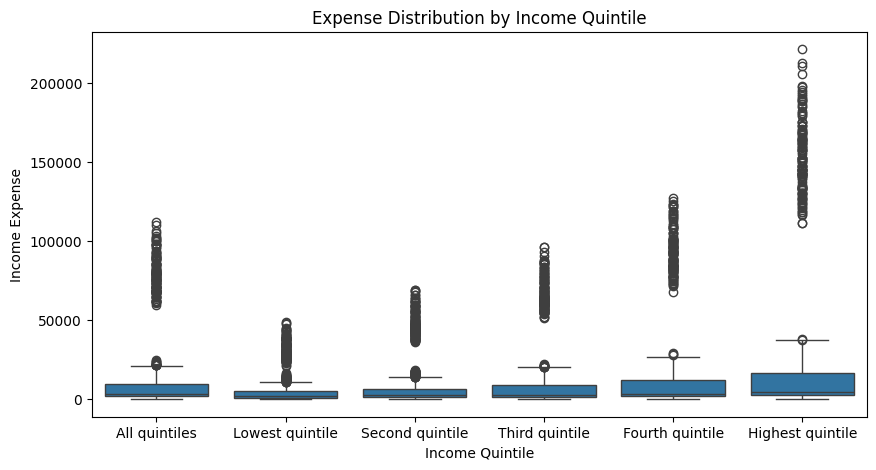

In [34]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df["Before-tax household income quintile"],y=df["Expense"])
plt.xlabel("Income Quintile")
plt.ylabel("Income Expense")
plt.title("Expense Distribution by Income Quintile")
plt.show()

## Which age group has the highest savings?

In [37]:
age_savings=df.groupby("Age of older adult")[["Income","Expense"]].sum()
age_savings["Savings Ratio"]=age_savings["Income"]/age_savings["Expense"]
print(age_savings.sort_values(by="Savings Ratio",ascending=False))

                          Income     Expense  Savings Ratio
Age of older adult                                         
Total all ages      1.386850e+09  20942243.0      66.222600
35 to 44 years      2.942892e+08  18758940.0      15.687945
45 to 54 years      3.232403e+08  24609299.0      13.134885
25 to 34 years      1.840406e+08  14171198.0      12.986945
55 to 64 years      3.115484e+08  36758192.0       8.475619
0 to 24 years       1.859581e+07  10158014.0       1.830654


## What is the year-over-year income growth rate?

In [39]:
yearly_income=df.groupby("REF_DATE")["Income"].sum()
income_growth=yearly_income.pct_change()*100
print(income_growth)

REF_DATE
2010         NaN
2011    2.213974
2012    1.766625
2013    1.620785
2014    1.810797
2015    1.275331
2016    1.178468
2017    1.798971
2019    3.433198
2021    4.654588
Name: Income, dtype: float64


## What percentage of income is spent on expenses per year?

In [40]:
yeraly_data=df.groupby("REF_DATE")[["Income","Expense"]].sum()
yearly_data["Expense Ratio"]=(yearly_data["Expense"]/yearly_data["Income"])*100
print(yearly_data["Expense Ratio"])

REF_DATE
2010    4.736835
2011    4.734893
2012    4.851527
2013    4.910126
2014    4.991310
2015    5.047809
2016    5.043371
2017    5.059396
2019    5.281882
2021    5.057414
Name: Expense Ratio, dtype: float64


## How do expenses vary over time for each income group?

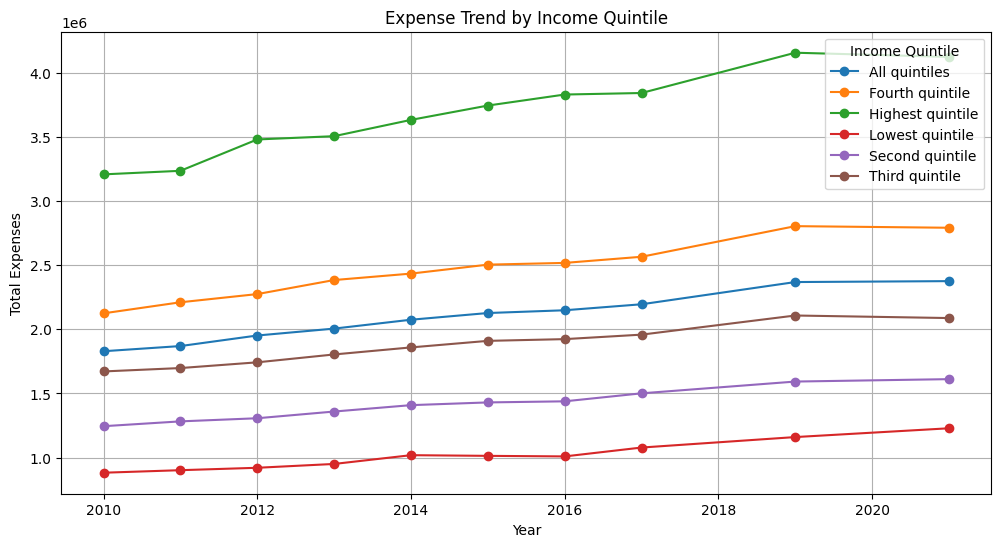

In [41]:
expense_trend=df.groupby(["REF_DATE","Before-tax household income quintile"])["Expense"].sum().unstack()
expense_trend.plot(figsize=(12,6),marker='o')
plt.xlabel("Year")
plt.ylabel("Total Expenses")
plt.title("Expense Trend by Income Quintile")
plt.legend(title="Income Quintile")
plt.grid(True)
plt.show()

## How to different provinces compare in income and expense distributuion?

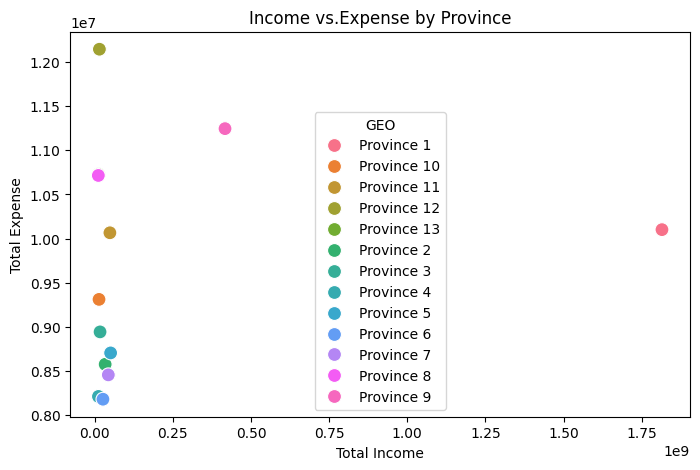

In [42]:
province_data=df.groupby("GEO")[["Income","Expense"]].sum()
plt.figure(figsize=(8,5))
sns.scatterplot(x=province_data["Income"],y=province_data["Expense"],hue=province_data.index,s=100)
plt.xlabel("Total Income")
plt.ylabel("Total Expense")
plt.title("Income vs.Expense by Province")
plt.show()

## What is the most common expense category?

In [47]:
expense_category_counts=df["Household expenditures, summary-level categories"].value_counts()
print(expense_category_counts)

Household expenditures, summary-level categories
Total expenditure                                          780
Food purchased from stores                                 780
Food purchased from restaurants                            780
Shelter                                                    780
Principal accommodation                                    780
Rented living quarters                                     780
Owned living quarters                                      780
Water, fuel and electricity for principal accommodation    780
Other accommodation                                        780
Household operations                                       780
Communications                                             780
Household furnishings and equipment                        780
Household furnishings                                      780
Household equipment                                        780
Household appliances                                       780
Clothi